# Проект: Статистический анализ данных

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
   - абонентская плата отсутствует;
   - стоимость одной минуты поездки —  8 рублей;
   - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
   - абонентская плата — 199 рублей в месяц;
   - стоимость одной минуты поездки — 6 рублей;
   - стоимость старта — бесплатно.
   
   
Цель исследования — Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Ход исследования:

- Обзор данных
- Предобработка данных
- Исследовательский анализ данных
- Добавляем новые данные
- Объединение данных
- Подсчёт выручки
- Проверка гипотез
- Распределения
- Вывод

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
#pd.set_option('max_columns', None)# чтобы выводить все столбцы
import numpy as np
import scipy.stats as st
from math import *
from scipy.stats import binom

## Шаг 1. Загрузка данных

Пользователи — users
- user_id	- уникальный идентификатор пользователя
- name	- имя пользователя
- age	- возраст
- city	- город
- subscription_type	- тип подписки (free, ultra)

Поездки — rides
- user_id	- уникальный идентификатор пользователя
- distance	- расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	- продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date	- дата совершения поездки

Подписки — subscriptions
- subscription_type	- тип подписки
- minute_price	- стоимость одной минуты поездки по данной подписке
- start_ride_price	- стоимость начала поездки
- subscription_fee	- стоимость ежемесячного платежа

 ##### Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы

In [2]:
try:
    users = pd.read_csv('/datasets/users_go.csv')
    riders = pd.read_csv('/datasets/rides_go.csv')
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    users = pd.read_csv('users_go.csv')
    riders = pd.read_csv('rides_go.csv')
    subscriptions = pd.read_csv('subscriptions_go.csv')

##### Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

In [3]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Аномалий пока не выявлено,все данные записаны в нужном формате

In [5]:
riders.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Аномальных значений не вявлено.Дату лучше перевести в формат даты

In [7]:
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


Аномальных значений не вявлено, все данные записаны в нужном формате

## Шаг 2. Предобработка данных

##### Приведите столбец date к типу даты pandas

In [9]:
riders['date'] = pd.to_datetime(riders['date'],format = '%Y-%m-%d')
riders['date']

0       2021-01-01
1       2021-01-18
2       2021-04-20
3       2021-08-11
4       2021-08-28
           ...    
18063   2021-11-04
18064   2021-11-16
18065   2021-11-18
18066   2021-11-27
18067   2021-12-29
Name: date, Length: 18068, dtype: datetime64[ns]

##### Создайте новый столбец с номером месяца на основе столбца date.

In [10]:
riders['date'].max(),riders['date'].min(),riders['date'].max()-riders['date'].min()

(Timestamp('2021-12-30 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timedelta('363 days 00:00:00'))

 Всего 363 дня одного года

In [11]:
riders['num_of_month'] = pd.DatetimeIndex(riders['date']).month
riders.head()

,user_id,distance,duration,date,num_of_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


##### Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

У нас есть 3 датафрейма: users, riders, subscriptions. 
Сначала проверим на пропуски:

In [12]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Пропущенных значений нет

In [13]:
riders.isna().sum()

user_id         0
distance        0
duration        0
date            0
num_of_month    0
dtype: int64

Пропущенных значений нет

In [14]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропущенных значений нет

Мы не нашли пропуски во всех датафреймах, теперь посмотрим на дубликаты явные и неявные

**Таблица users**

In [15]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [16]:
users.duplicated().sum()

31

Все дубликаты

In [17]:
users.drop_duplicates(inplace=True)

In [18]:
users.duplicated().sum()

0

Удаляем явные дубликаты

Посмотрим на неявные дубликаты

In [19]:
users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

в столбце subscription_type - неявных дубликатов нет

In [20]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявных дубликатов в столбце city не выявлено

In [21]:
set(users['name'].unique())

{'Агата',
 'Аделина',
 'Адель',
 'Айдар',
 'Александр',
 'Александра',
 'Алексей',
 'Алина',
 'Алиса',
 'Алия',
 'Алла',
 'Альберт',
 'Альбина',
 'Алёна',
 'Амалия',
 'Амина',
 'Амир',
 'Анастасия',
 'Анатолий',
 'Ангелина',
 'Андрей',
 'Анжелика',
 'Анна',
 'Антон',
 'Антонина',
 'Ариана',
 'Арина',
 'Арсен',
 'Арсений',
 'Артемий',
 'Артур',
 'Артём',
 'Богдан',
 'Борис',
 'Вадим',
 'Валентина',
 'Валерий',
 'Валерия',
 'Варвара',
 'Василий',
 'Василина',
 'Василиса',
 'Вера',
 'Вероника',
 'Виктор',
 'Виктория',
 'Виолетта',
 'Виталий',
 'Виталина',
 'Влад',
 'Влада',
 'Владимир',
 'Владислав',
 'Владислава',
 'Всеволод',
 'Вячеслав',
 'Галина',
 'Георгий',
 'Герман',
 'Глеб',
 'Гордей',
 'Григорий',
 'Давид',
 'Дамир',
 'Даниил',
 'Данил',
 'Данила',
 'Даниэль',
 'Дарина',
 'Дарья',
 'Демид',
 'Денис',
 'Диана',
 'Дмитрий',
 'Ева',
 'Евгений',
 'Евгения',
 'Егор',
 'Екатерина',
 'Елена',
 'Елизавета',
 'Елисей',
 'Есения',
 'Жанна',
 'Зарина',
 'Захар',
 'Злата',
 'Иван',
 'Игнат',

Неявных дубликатов в столбце name не выявлено

**Таблица riders**

In [22]:
riders.head()

,user_id,distance,duration,date,num_of_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [23]:
riders.duplicated().sum()

0

**Таблица subscriptions**

In [24]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Дубликатов нет

**Вывод:**
- создали новый столбцец в таблице riders - 'num_of_month'
- Удалили в таблице users яные дубликаты

## Шаг 3. Исследовательский анализ данных

##### частота встречаемости городов

In [25]:
users['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

Относительная частота встречаемости того или иного признака определяется по формуле: p= k ×100%

In [108]:
city_counts = round(users['city'].value_counts()/users['city'].value_counts().sum(),2)*100
city_counts

city
Пятигорск         14.0
Екатеринбург      13.0
Ростов-на-Дону    13.0
Краснодар         13.0
Сочи              12.0
Омск              12.0
Тюмень            12.0
Москва            11.0
Name: count, dtype: float64

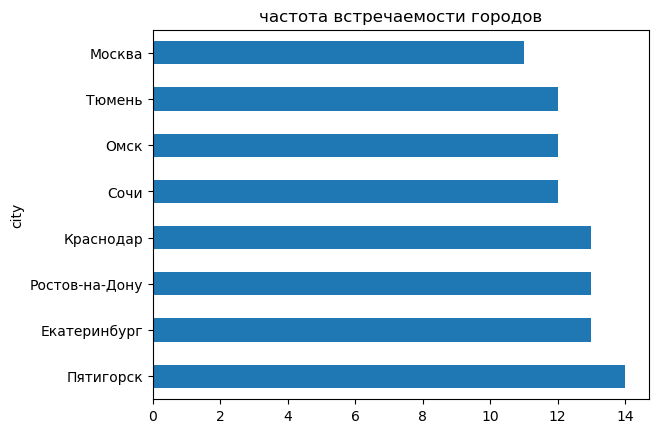

In [107]:
city_counts.plot(kind='barh',title = 'частота встречаемости городов');

**вывод:** Чаще всего встречается Пятигорск, реже всего Москва

##### соотношение пользователей с подпиской и без подписки

In [28]:
free_ultra_merge = users['subscription_type'].value_counts()

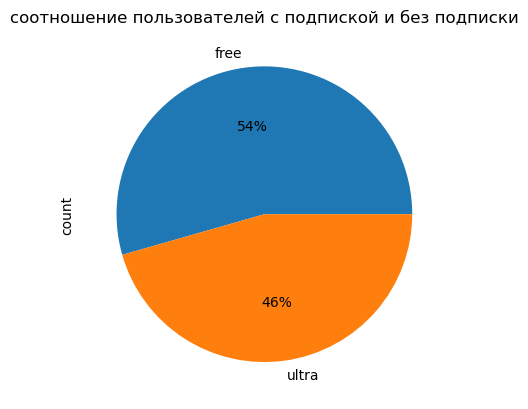

In [29]:
users['subscription_type'].value_counts().plot(y = free_ultra_merge,
                                               kind = 'pie',
                                               autopct = '%1.0f%%',
                                               title = 'соотношение пользователей с подпиской и без подписки');

С подпиской 46%, а без нее 54%. Людей без подписки больше на 8%, чем купивших ее

##### возраст пользователей

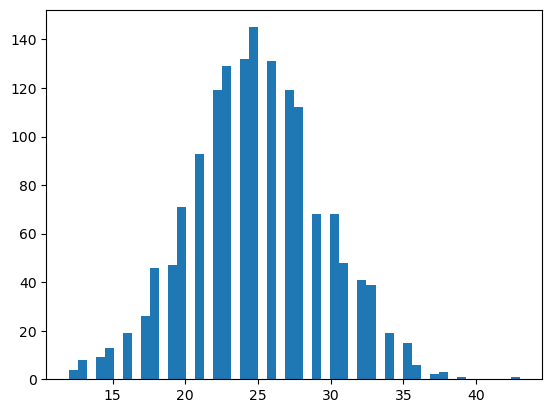

In [30]:
plt.hist(users['age'],bins=50)
plt.title = 'Возраст пользоватей';

In [31]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Больше всего пользоватей возраста от 21 до 28 лет, самому большому количество пользователей 25 лет. Меньше всего пользователей 12-17 лет и начиная с 34 до 43 лет. Меньше всего пользователей которым 43 года.

##### расстояние, которое пользователь преодолел за одну поездку

In [32]:
riders['distance'].sort_values()

11555       0.855683
9541        2.570787
13690       4.329506
8658        6.784447
7841        7.097072
            ...     
17242    6724.932981
17171    6760.940067
15580    6908.491343
16484    7066.003772
16309    7211.007745
Name: distance, Length: 18068, dtype: float64

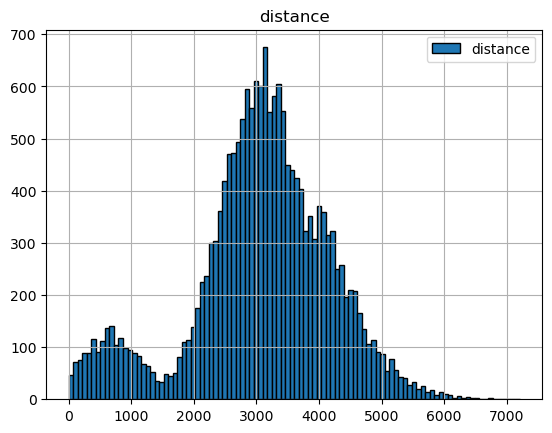

In [33]:
riders.hist('distance',bins = 100 ,ec='black',legend=True);

In [34]:
riders['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Максимальная дистанция которую проехал пользователь за одну поездку равна 7211 метроа, а минимальная меньше метра. Чаще всего пользователи проезжали примерно 3100 метров.
Видим всплеск слева от 500 до 1000 метров.

##### продолжительность поездок

In [35]:
riders['duration']

0        25.599769
1        15.816871
2         6.232113
3        18.511000
4        26.265803
           ...    
18063    19.822962
18064    21.409799
18065    18.435051
18066    16.674362
18067    15.893917
Name: duration, Length: 18068, dtype: float64

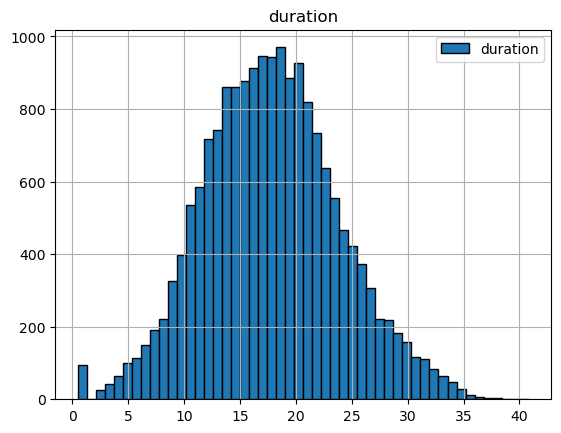

In [36]:
riders.hist('duration',bins = 50 ,ec='black',legend=True);

In [37]:
riders['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Минимальная поездка была около минуты, а максимальная прмерно 40 минут. Но чаще всего пользователи проводят в пути 19 минут

<Axes: >

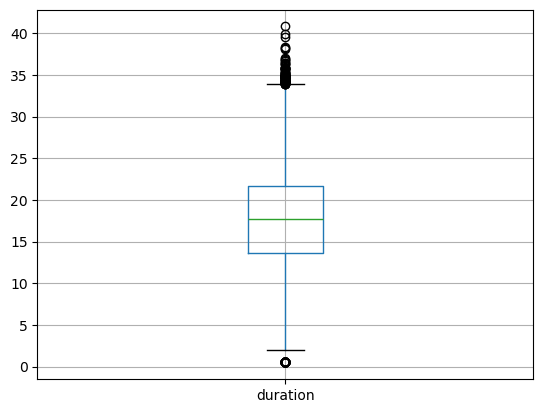

In [38]:
riders.boxplot(column='duration')


Видим очень маленькие аномальные значения возле 0 

In [106]:
riders.query('duration<1').head()

,user_id,distance,duration,date,num_of_month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2


Видим, что есть 95 сессий меньше 1ой минуты. Все аномалии в разные время, и все пользователи проехали более 4000 метров

In [86]:
display(riders.query('duration<1').sort_values('distance')['distance'].describe())
display(riders['distance'].describe())

count      95.000000
mean     5113.176549
std       658.254104
min      4030.308008
25%      4611.510820
50%      5052.769411
75%      5488.459099
max      7211.007745
Name: distance, dtype: float64

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

**Вывод**
- Чаще всего встречается Пятигорск, реже всего Москва
- Людей без подписки больше на 8%, чем купивших ее
- Больше всего пользоватей возраста от 21 до 28 лет, самому большому количество пользователей 25 лет. Меньше всего пользователей 12-17 лет и начиная с 34 до 43 лет. Меньше всего пользователей которым 43 года.
- Максимальная дистанция которую проехал пользователь за одну поездку равна 7211 метроа, а минимальная меньше метра. Чаще всего пользователи проезжали примерно 3100 метров.
- Минимальная поездка была около минуты, а максимальная прмерно 40 минут. Но чаще всего пользователи проводят в пути 19 минут
- Нашли аномалии: видим, что есть 95 сессий меньше 1ой минуты. Все аномалии в разные время, и все пользователи проехали более 4000 метров

## Шаг 4. Объединение данных

##### Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge()

In [87]:
data = riders.merge(users)#.merge(subscriptions)
data.head()

,user_id,distance,duration,date,num_of_month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra


In [88]:
len(data)==len(riders)

True

In [43]:
data.isna().sum()

user_id              0
distance             0
duration             0
date                 0
num_of_month         0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [44]:
data.duplicated().sum()

0

Объединение таблиц прошло успешно

##### Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:

c данными о пользователях c подпиской

In [89]:
data_ultra_sub = data.query("subscription_type == 'ultra'")
data_ultra_sub.head()

,user_id,distance,duration,date,num_of_month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra


с данными о пользователях без подписки.

In [105]:
data_free_sub = data.query("subscription_type == 'free'")
data_free_sub.head()

,user_id,distance,duration,date,num_of_month,name,age,city,subscription_type
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free


In [93]:
data_free_sub.shape+data_ultra_sub.shape,data.shape

((11568, 9, 6500, 9), (18068, 9))

In [47]:
len(data) == (len(data_free_sub) + len(data_ultra_sub))

True

##### Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

Расстояние и время поездок для пользователей c подпиской

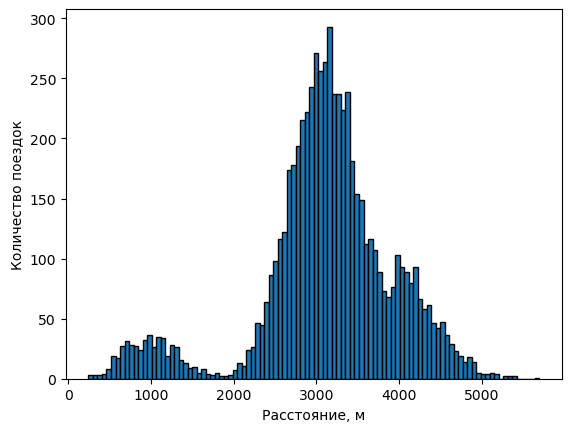

In [100]:
plt.hist(data_ultra_sub['distance'],ec='black',bins = 100)
#plt.title('Расстояние(платный тариф)')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок');

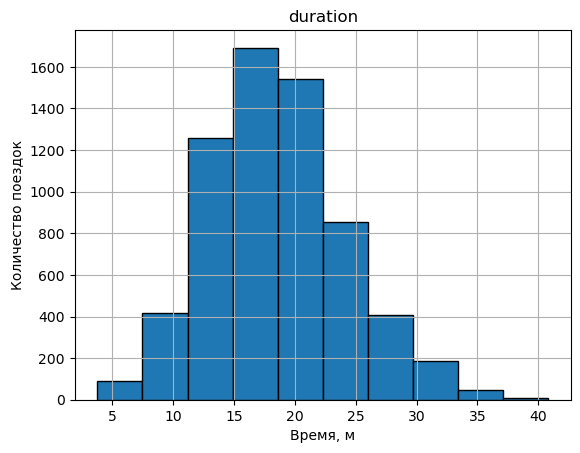

In [101]:
data_ultra_sub.hist('duration',ec='black');
#plt.title('Время(платный тариф)');
plt.xlabel('Время, м');
plt.ylabel('Количество поездок');

Расстояние и время поездок для пользователей без подписки

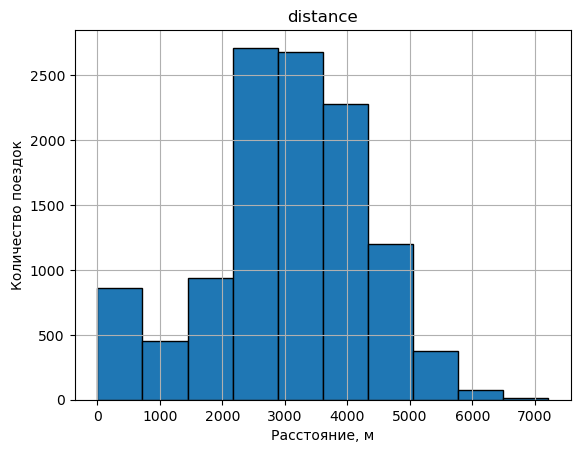

In [102]:
data_free_sub.hist('distance',ec='black');
#plt.title('Расстояние(бесплатный тариф)');
plt.xlabel('Расстояние, м');
plt.ylabel('Количество поездок');

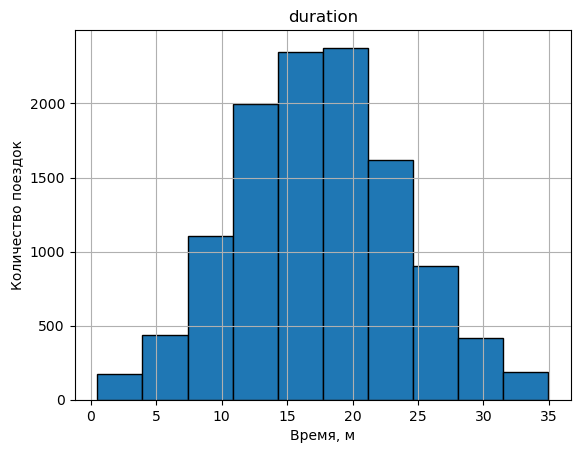

In [103]:
data_free_sub.hist('duration',ec='black');
#plt.title('Время(бесплатный тариф)');
plt.xlabel('Время, м');
plt.ylabel('Количество поездок');

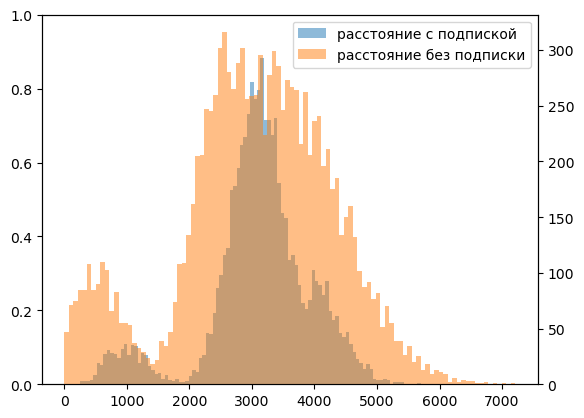

In [52]:
x = data_ultra_sub['distance']
y = data_free_sub['distance']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.hist(x, bins=100, alpha=0.5, label='расстояние с подпиской')
plt.hist(y, bins=100, alpha=0.5, label='расстояние без подписки')
plt.legend(loc='upper right')
plt.show()

In [53]:
'с подпиской',data_ultra_sub['distance'].describe(),'без подписки',data_free_sub['distance'].describe()

('с подпиской',
 count    6500.000000
 mean     3115.445388
 std       836.895330
 min       244.210438
 25%      2785.444017
 50%      3148.637229
 75%      3560.574425
 max      5699.769662
 Name: distance, dtype: float64,
 'без подписки',
 count    11568.000000
 mean      3045.495282
 std       1246.173806
 min          0.855683
 25%       2366.562689
 50%       3114.648465
 75%       3905.697894
 max       7211.007745
 Name: distance, dtype: float64)

Чаще встречаются короткие поездки (до 500 м) у пользователей без подписки. Медиана отличается не сильно. Больший разброс наблюдается у пользователей без подписки. График расстояний с подпиской более узкий,ежели график без подписки.

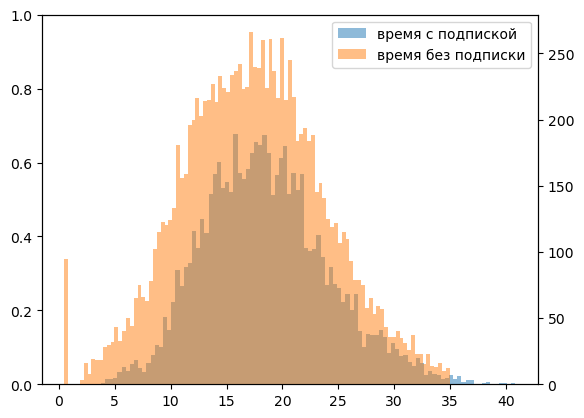

In [54]:
x = data_ultra_sub['duration']
y = data_free_sub['duration']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.hist(x, bins=100, alpha=0.5, label='время с подпиской')
plt.hist(y, bins=100, alpha=0.5, label='время без подписки')
plt.legend(loc='upper right')
plt.show()

In [55]:
'с подпиской',data_ultra_sub['duration'].describe(),'без подписки',data_free_sub['duration'].describe()

('с подпиской',
 count    6500.000000
 mean       18.541985
 std         5.572048
 min         3.760353
 25%        14.524654
 50%        18.178153
 75%        21.884129
 max        40.823963
 Name: duration, dtype: float64,
 'без подписки',
 count    11568.000000
 mean        17.390909
 std          6.326803
 min          0.500000
 25%         12.958437
 50%         17.326890
 75%         21.594071
 max         34.948498
 Name: duration, dtype: float64)

Время без подписки есть выброс значений около 0. Медиана примерно одинакова. Разброса у значений нет

**Вывод:**
- Сделали общий датафрейм - data
- Сделали датафреймы без подписки data_free_sub, и с подпиской data_ultra_sub
- Для data_free_sub:
    - максимальное Время в пути примерно 35 минут, а минимальное примерно 1 минута, чаще всего люди проводят в пути - около 16 минут
    - максимальное Расстояние около 7000 метров,а минимальное - меньше 1, чаще всего люди проезжают чуть меньше 3000 метров
- Для data_ultra_sub:
    - максимальное Время в пути примерно 40 минут, а минимальное примерно 3 минуты, чаще всего люди проводят в пути - около 16-20 минут
    - максимальное Расстояние около 5500 метров,а минимальное - меньше 100, чаще всего люди проезжают чуть меньше 3000 метров
    
- Чаще встречаются короткие поездки (до 500 м) у пользователей без подписки. Медиана отличается не сильно. Больший разброс наблюдается у пользователей без подписки. График расстояний с подпиской более узкий,ежели график без подписки.
- Время без подписки есть выброс значений около 0. Медиана примерно одинакова. Разброса у значений нет

## Шаг 5. Подсчёт выручки

##### Создайте датафрейм с агрегированными данными: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [56]:
data['duration'] = np.ceil(data['duration']) 
data_agg = data.pivot_table(index = ['num_of_month','user_id'],
                            values = ['distance','duration','name'],
                            aggfunc = {'distance':'sum','duration':'sum','name':'count'})
data_agg.rename(columns = {'name':'count_distance'},inplace = True)
data_agg.query('user_id == 1')

,,distance,duration,count_distance
num_of_month,user_id,,,
1,1,7027.511294,42.0,2
4,1,754.159807,7.0,1
8,1,6723.470560,46.0,2
10,1,5809.911100,32.0,2
11,1,7003.499363,56.0,3
12,1,6751.629942,28.0,2


##### В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь

В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 
25.3
25.3, 
25.5
25.5 и 
26.0
26.0 должны быть преобразованы к 
26
26.

In [57]:
data_agg['subscription_type'] = data.pivot_table(index = ['num_of_month','user_id'],
                            values = 'subscription_type',aggfunc = 'min')
data_agg

distance  duration  count_distance subscription_type
num_of_month user_id                                                         
1            1        7027.511294      42.0               2             ultra
             3        3061.777147      13.0               1             ultra
             5        3914.646990      13.0               1             ultra
             7        6478.080979      28.0               2             ultra
             12       3577.151148      33.0               1             ultra
...                           ...       ...             ...               ...
12           1525     4597.854350      34.0               1              free
             1526     3644.121544      23.0               1              free
             1528     3998.569324      11.0               1              free
             1532     6111.889853      42.0               2              free
             1534     2371.711192      16.0               1              free

[11331 rows x 4 columns]

стоимость старта поездки × количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.
- без подписки
   - абонентская плата отсутствует;
   - стоимость одной минуты поездки —  8 рублей;
   - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
   - абонентская плата — 199 рублей в месяц;
   - стоимость одной минуты поездки — 6 рублей;
   - стоимость старта — бесплатно.

In [104]:
def pay_for_month(row):
    if row['subscription_type'] == 'free':
        return 50*row['count_distance']+8*row['duration']+0
    if row['subscription_type'] == 'ultra':
        return 0*row['count_distance']+6*row['duration']+199
    

data_agg['pay_for_month'] = data_agg.apply(pay_for_month, axis=1)
data_agg.head()

distance  duration  count_distance subscription_type  \
num_of_month user_id                                                            
1            1        7027.511294      42.0               2             ultra   
             3        3061.777147      13.0               1             ultra   
             5        3914.646990      13.0               1             ultra   
             7        6478.080979      28.0               2             ultra   
             12       3577.151148      33.0               1             ultra   

                      pay_for_month  
num_of_month user_id                 
1            1                451.0  
             3                277.0  
             5                277.0  
             7                367.0  
             12               397.0

In [59]:
data_agg['pay_for_month'].describe()

count    11331.000000
mean       342.303504
std        153.875346
min         58.000000
25%        234.000000
50%        319.000000
75%        415.000000
max       1444.000000
Name: pay_for_month, dtype: float64

**Вывод:**
- Создали датафрейм с агрегированными данными - data_agg, в котором включены столбцы:суммарное расстояние - distance, количество поездок - count_distance  и суммарное время для каждого пользователя за каждый месяц - duration
- Добавили столбец с помесячной выручкой - pay_for_month 

#### Шаг 6. Проверка гипотез

##### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.


H_0: Среднее время (duration) пользователей на подписке ultra = среднее время (duration) пользователей на подписке free

H_1: Среднее время (duration) пользователей на подписке ultra > среднее время (duration) пользователей на подписке free

In [60]:
# задаём уровень значимости
alpha = 0.05
results = st.ttest_ind(data_ultra_sub['duration'],data_free_sub['duration'],alternative = 'greater')
print(f'p-value:{results.pvalue}')
if results.pvalue<alpha:
    print('Отвергаем гипотезу')
else:
    print('Пользователи с подпиской могут быть «выгоднее» для компании')

p-value:1.2804098316645618e-34
Отвергаем гипотезу


Нулевая гипотеза отвергнута, есть основания утверждать, что средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки при установленном уровне значимости в 5 %

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы

H_0: Расстояние (distance) пользователей на подписке ultra <= 3110

H_1: Расстояние (distance) пользователей на подписке ultra > 3110

In [61]:
middle = 3130.0
alpha = 0.05
result = st.ttest_1samp(data_ultra_sub['distance'],middle,alternative = 'greater')

print(f'p-value:{result.pvalue}')
if result.pvalue<alpha:
    print('Отвергаем гипотезу')
else:
    print('Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров')

p-value:0.9195368847849785
Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров


Нулевая гипотеза не отвергнута, расстояние поездок является оптимальным с точки зрения износа самоката, он в пределах нормы, не завышен, установленном уровне значимости в 5 %

##### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод

H_0: Помесячная выручка (pay_for_month) пользователей на подписке ultra = Помесячная выручка (pay_for_month) пользователей на подписке free

H_1: Помесячная выручка (pay_for_month) пользователей на подписке ultra > Помесячная выручка (pay_for_month) пользователей на подписке free

In [62]:
alpha = 0.05
result2 = st.ttest_ind(data_agg.loc[data_agg.subscription_type == 'ultra','pay_for_month'],
                        data_agg.loc[data_agg.subscription_type =='free','pay_for_month'],alternative = 'greater')

print(f'p-value:{result2.pvalue}')
if result2.pvalue<alpha:
    print('Отвергаем гипотезу')
else:
    print('Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки')

p-value:1.8850394384715216e-31
Отвергаем гипотезу


Нулевая гипотеза отвергнута, есть основания утверждать, что помесячная выручка с подпиской больше помесячная выручки без подписки при установленном уровне значимости в 5 %

##### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Тест с зависимыми выборками, так как мы обновляем один и тот же датафрейм - scipy.stats.ttest_rel(до обновления, после)

H_0: data1=data2

H_1: data1 < data2

## Шаг 7. Распределения

##### Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

При раздаче промокодов в количестве 1161 вероятность, не выполнить план меньше 5.0 %


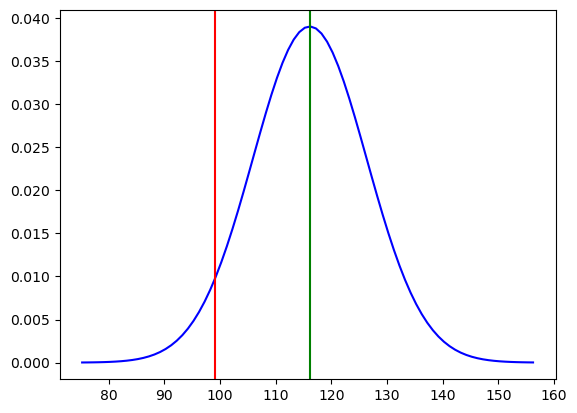

In [63]:
n = 1000
p = 0.1
k = 99
binom_cdf = 0.05

while binom_cdf < binom.cdf(k, n, p):
    n += 1
print(f'При раздаче промокодов в количестве {n} вероятность, не выполнить план меньше {binom.cdf(k, n, p).round(2)*100} %')

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

arange = np.arange((mu - 4 * sigma),(mu + 4 * sigma),1)

plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
plt.axvline(x=k, color='red')
plt.axvline(x=mu, color='green')
plt.show()

Необходимо довести до подписчиков как минимум 1161 промокода, для того чтобы как минимум 100 существующих клиентов продлили подписку

##### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [64]:
# задаём параметры биномиального распределения

n = 1000000

p = 0.4

# зададим мат.ожидание и ст.отклонение нормального распределения равными

# мат.ожиданию и ст.отклонению биномиального распределения

mu = n * p

sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение

distr = st.norm(mu, sigma)

# считаем вероятность хвоста слева от 43 тысяч

result = distr.cdf(399500)

print(result)


0.15371708296369768


Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей = 15%

## Вывод

1. Предобработка данных.
- Привели столбец `date`  к типу даты datetime64[ns]
- Создали новый столбец с номером месяца `num_of_month`
- Проверили наличие пропущенных значений в каждой таблице и поняли,что их нет.
- Проверили наличие явных и неявных дубликатов в таблицах. Удалили в таблице users яные дубликаты

2. Исследовательский анализ данных

- Исследуя частоту встречаемости городов, вяснили,что чаще всего встречается Пятигорск, реже всего Москва
- Соотношение пользователей с подпиской и без подписки: С подпиской 46%, а без нее 54%. Людей без подписки больше на 8%, чем купивших ее
- Больше всего пользоватей возраста от 21 до 28 лет, самому большому количество пользователей 25 лет. Меньше всего пользователей 12-17 лет и начиная с 34 до 43 лет. Меньше всего пользователей которым 43 года.
- Максимальная дистанция которую проехал пользователь за одну поездку равна 7211 метроа, а минимальная меньше метра. Чаще всего пользователи проезжали примерно 3100 метров.
- Минимальная поездка была около минуты, а максимальная прмерно 40 минут. Но чаще всего пользователи проводят в пути 19 минут

3.  Объединение данных
- Объединили все данные в одну таблицу `data`, с помощью merge()
- Создали 2 датафрейма один с подпиской `data_ultra_sub`, другой без `data_free_sub`
- Визуализировали данные и сделали микровывод:
    - Для `data_free_sub`:
  - максимальное Время в пути примерно 35 минут, а минимальное примерно 1 минута, чаще всего люди проводят в пути - около 16 минут
  - максимальное Расстояние около 7000 метров,а минимальное - меньше 1, чаще всего люди проезжают чуть меньше 3000 метров
    - Для `data_ultra_sub`:
  - максимальное Время в пути примерно 40 минут, а минимальное примерно 3 минуты, чаще всего люди проводят в пути - около 16-20 минут
  - максимальное Расстояние около 5500 метров,а минимальное - меньше 100, чаще всего люди проезжают чуть меньше 3000 метров
- Нашли аномалии: видим, что есть 95 сессий меньше 1ой минуты. Все аномалии в разные время, и все пользователи проехали более 4000 метров
- Чаще встречаются короткие поездки (до 500 м) у пользователей без подписки. Медиана отличается не сильно. Больший разброс наблюдается у пользователей без подписки. График расстояний с подпиской более узкий,ежели график без подписки.
- Время без подписки есть выброс значений около 0. Медиана примерно одинакова. Разброса у значений нет
4. Подсчёт выручки
- Создали датафрейм с агрегированными данными - `data_agg`, в котором включены столбцы:суммарное расстояние - distance, количество поездок - `count_distance` и суммарное время для каждого пользователя за каждый месяц - duration
- Добавили столбец с помесячной выручкой - `pay_for_month`
5. Проверка гипотез
- Тратят ли пользователи с подпиской больше времени на поездки? - Нулевая гипотеза отвергнута, есть основания утверждать, что средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки при установленном уровне значимости в 5 %
- Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? - Нулевая гипотеза не отвергнута, расстояние поездок является оптимальным с точки зрения износа самоката, он в пределах нормы, не завышен, установленном уровне значимости в 5 %
- Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки - Нулевая гипотеза не отвергнута, расстояние поездок оптимальным с точки зрения износа самоката, т.е., что он в пределах нормы, не завышен, установленном уровне значимости в 5 %
- Тест с зависимыми выборками, так как мы обновляем один и тот же датафрейм - `scipy.stats.ttest_rel(до обновления, после)`
6. Распределения
- Необходимо довести до подписчиков как минимум 1161 промокода, для того чтобы как минимум 100 существующих клиентов продлили подписку
- Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей = 15%

Пользователи с подпиской более выгодные для сервиса аренды самокатов